## ResNet Robustness tests

In [4]:
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm

In [5]:
def get_test_splits(split_n):
    '''
    This function receives a split number split_n and returns
    a dataframe pointing to the test images
    '''
    path = './data/split_'+str(split_n)+'/split_'+str(split_n)+"_"
    test_df = pd.read_csv(path+'test.csv')

    return test_df

In [6]:
test_set_1 = get_test_splits(1)
test_set_2 = get_test_splits(2)
test_set_3 = get_test_splits(3)

In [7]:
def image_reader(dataframe):
    '''
    Takes as input a dataframe pointing to the image files, and returns a 
    dictionary with the test images
    '''
    image_dict = {}
    file_locations = list(dataframe['image_id'])
    labels = list(dataframe['label'])
    category_0 = []
    category_1 = []
    for i in tqdm(range(len(file_locations))):
        image = cv2.imread(file_locations[i]) #, cv2.COLOR_RGB2BGR)
        if labels[i] == 0:
            category_0.append(image)
        else:
            category_1.append(image)

    image_dict[0] = category_0
    image_dict[1] = category_1

    return image_dict

In [119]:
test_images_1 = image_reader(test_set_1)
test_images_2 = image_reader(test_set_2)
test_images_3 = image_reader(test_set_3)

  0%|          | 0/810 [00:00<?, ?it/s]

  0%|          | 0/790 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

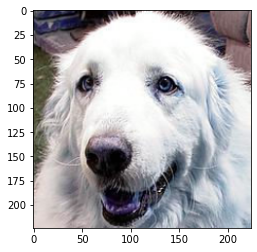

In [14]:
plt.imshow(test_images_1[0][0])

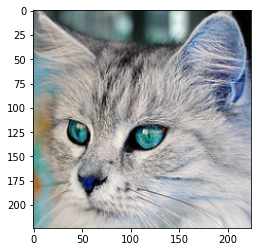

In [15]:
plt.imshow(test_images_1[1][0])

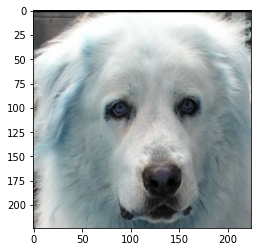

In [17]:
plt.imshow(test_images_2[0][0])

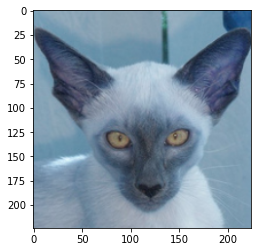

In [18]:
plt.imshow(test_images_2[1][0])

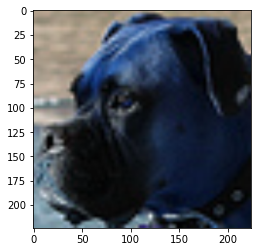

In [19]:
plt.imshow(test_images_3[0][0])

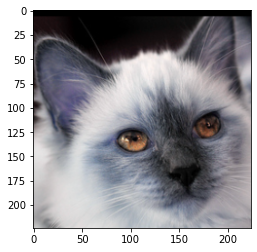

In [20]:
plt.imshow(test_images_3[1][0])

### 5.1 Gaussian pixel noise
To each pixel, to each colour channel, add a Gaussian distributed random number with 10 increas-
ing standard deviations from {0, 2, 4, 6, 8, 10, 12, 14, 16, 18} g. Make sure that the pixel values
are integers in the range 0..255 (e.g. replace negative numbers by 0, values > 255 by 255).

In [49]:
from numpy.random import normal

In [112]:
stds = np.arange(0, 19, 2)
normal(loc=0, scale=0)

0.0

Standard deviation: 0


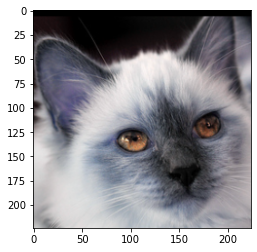

Standard deviation: 2


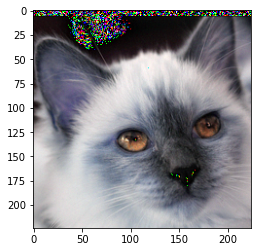

Standard deviation: 4


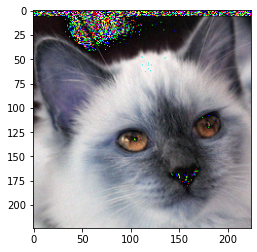

Standard deviation: 6


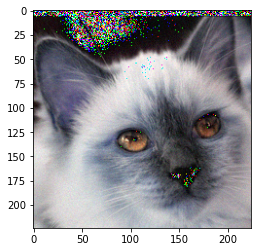

Standard deviation: 8


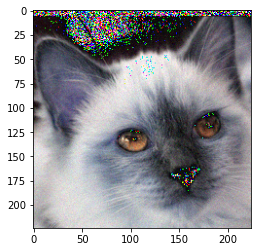

Standard deviation: 10


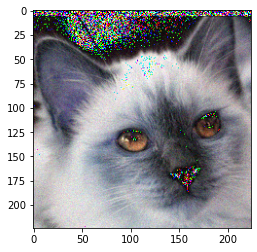

Standard deviation: 12


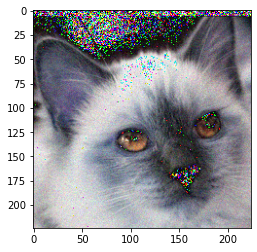

Standard deviation: 14


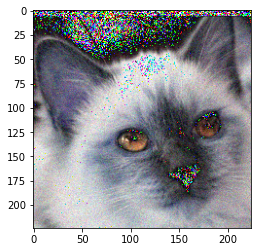

Standard deviation: 16


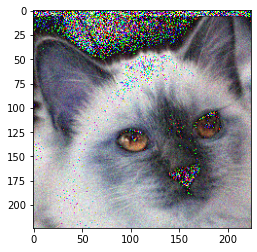

Standard deviation: 18


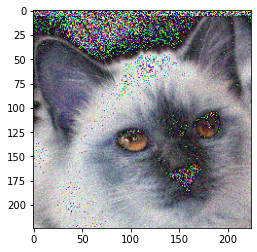

In [122]:
for std in stds:
    image = np.array(test_images_3[1][0]).copy()
    n_rows, n_columns, n_channels = image.shape
    print(f"Standard deviation: {std}")
    for channel in range(n_channels):
        for row in range(n_rows):
            for column in range(n_columns):
                image[row][column][channel] += normal(loc=0, scale=std)
                if image[row][column][channel] < 0:
                    image[row][column][channel] = 0
                elif image[row][column][channel] > 255:
                    image[row][column][channel] = 255
    plt.imshow(image)
    plt.show()

### 5.2 Gaussian blurring
Create 10 test images by blurring the original image (in each of the 3 colour channels) by a 3x3 mask:
        [1, 2, 1]
   1/16*[2, 4, 2]
        [1, 2, 1]
Repeatedly  convolve  the  the  image  with  the  mask  0  times,  1  time,  2  times,  ...   9  times.   Thisapproximates Gaussian blurring with increasingly larger standard deviations.

In [125]:
import cv2

In [126]:
image = np.array(test_images_3[1][0]).copy()

In [129]:
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]])
kernel = 1/16 * kernel
kernel

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

Convolved 0 times


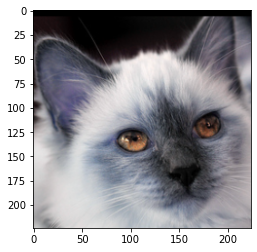

Convolved 1 times


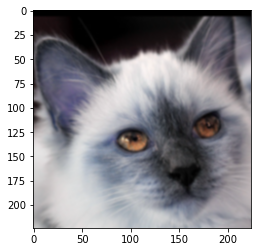

Convolved 2 times


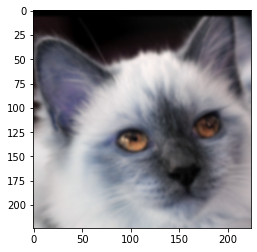

Convolved 3 times


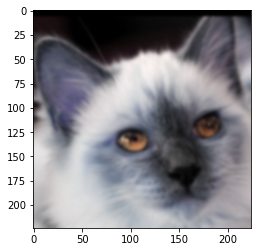

Convolved 4 times


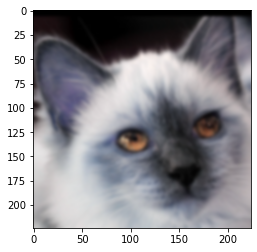

Convolved 5 times


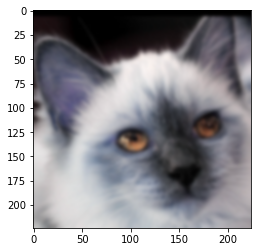

Convolved 6 times


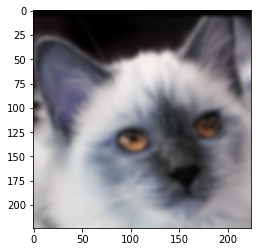

Convolved 7 times


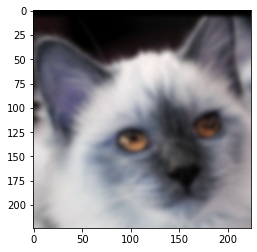

Convolved 8 times


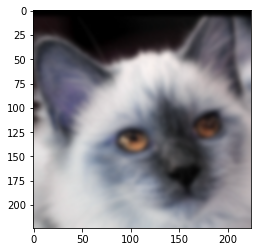

Convolved 9 times


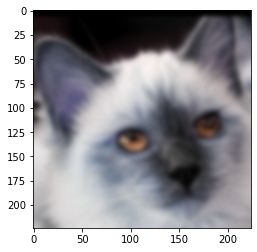

In [134]:
num_convs = np.arange(10)
for n_convs in num_convs:
    image = np.array(test_images_3[1][0]).copy()
    print(f"Convolved {n_convs} times")
    for conv in range(n_convs):
        image = cv2.filter2D(image, -1, kernel)
    plt.imshow(image)
    plt.show()

### 5.3    Image contrast increaseCreate test images by multiplying each channel by{1.0, 1.03, 1.06, 1.09, 1.12, 1.15, 1.18, 1.21,1.24, 1.27}.  Make sure that the pixel values are integers in the range 0..255 (e.g.replace>255values by 255).